In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import src.preprocess as prep
import src.eda as eda

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chelsearamos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

# Load Data

In [4]:
path_to_dir = 'data'

df = prep.merge_csv_mult_dir(path_to_dir)

	Non-zip folders/files found in data: ['links_1', 'links_6', 'links_7', 'links_5', 'links_2', 'links_3', 'links_4']


In [5]:
print('Shape:', df.shape)
df.head()

Shape: (826927, 11)


,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder
0,751960476,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 28, 2020",Originally I picked this hotel as it was near ...,"Phoenix, Arizona","thechronictraveller</div><div class=""userLoc"">...",23,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
1,736861148,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"January 4, 2020",This is a great hotel. It's away from Waikiki ...,"Lewisburg, Tennessee","bitsmom_tn</div><div class=""userLoc""><strong>L...",56,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
2,751805209,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 25, 2020","When I checked out of my room, I left my Kindl...",NaN,D7133GLjoannew,0,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
3,749977541,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020","Honestly, I was not expecting much but the hot...",Los Angeles,"Adrian L</div><div class=""userLoc""><strong>Los...",209,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
4,749895049,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020",Clean and convenient place if you need to be n...,NaN,Lydia B,0,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1


In [6]:
eda.get_nulls(df)

,Total,Percent,Type
user_location,142554,0.17239,object
folder,0,0.00000,object
csv,0,0.00000,object
rating,0,0.00000,float64
helpful_vote,0,0.00000,int64
user_name,0,0.00000,object
review_body,0,0.00000,object
review_date,0,0.00000,object
hotel_name,0,0.00000,object
url,0,0.00000,object


In [7]:
df = prep.clean_and_prep(df)

print('Shape:', df.shape)
df.head()

Shape: (826927, 16)


,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder,city,user_name_clean,polarity,sentiment_int,sentiment
0,751960476,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 28, 2020",Originally I picked this hotel as it was near ...,"Phoenix, Arizona","thechronictraveller</div><div class=""userLoc"">...",23,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,thechronictraveller,1.0,2,positive
1,736861148,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"January 4, 2020",This is a great hotel. It's away from Waikiki ...,"Lewisburg, Tennessee","bitsmom_tn</div><div class=""userLoc""><strong>L...",56,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,bitsmom_tn,1.0,2,positive
2,751805209,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 25, 2020","When I checked out of my room, I left my Kindl...",n/a,D7133GLjoannew,0,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,D7133GLjoannew,1.0,2,positive
3,749977541,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020","Honestly, I was not expecting much but the hot...",Los Angeles,"Adrian L</div><div class=""userLoc""><strong>Los...",209,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Adrian L,1.0,2,positive
4,749895049,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020",Clean and convenient place if you need to be n...,n/a,Lydia B,0,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Lydia B,1.0,2,positive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826927 entries, 0 to 826926
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   review_id        826927 non-null  int64  
 1   url              826927 non-null  object 
 2   hotel_name       826927 non-null  object 
 3   review_date      826927 non-null  object 
 4   review_body      826927 non-null  object 
 5   user_location    826927 non-null  object 
 6   user_name        826927 non-null  object 
 7   helpful_vote     826927 non-null  int64  
 8   rating           826927 non-null  float64
 9   csv              826927 non-null  object 
 10  folder           826927 non-null  object 
 11  city             826927 non-null  object 
 12  user_name_clean  826927 non-null  object 
 13  polarity         826927 non-null  float64
 14  sentiment_int    826927 non-null  int64  
 15  sentiment        826927 non-null  object 
dtypes: float64(2), int64(3), object(11)
me

# EDA

In [9]:
eda.print_unique_ct(df)

Count of Unique Values per Column:

review_id: 826923
url: 165531
hotel_name: 608
review_date: 5852
review_body: 826813
user_location: 57782
user_name: 694411
helpful_vote: 1156
rating: 5
csv: 608
folder: 7
city: 65
user_name_clean: 609502
polarity: 3
sentiment_int: 3
sentiment: 3


In [10]:
df.describe()

,review_id,helpful_vote,rating,polarity,sentiment_int
count,8.269270e+05,826927.000000,826927.000000,826927.000000,826927.000000
mean,4.305791e+08,27.057779,4.309516,0.882683,1.765366
std,1.946247e+08,292.841537,1.004980,0.282477,0.564954
min,7.051910e+05,0.000000,1.000000,0.000000,0.000000
25%,2.592062e+08,1.000000,4.000000,1.000000,2.000000
50%,4.418382e+08,7.000000,5.000000,1.000000,2.000000
75%,5.988721e+08,24.000000,5.000000,1.000000,2.000000
max,7.568369e+08,117229.000000,5.000000,1.000000,2.000000


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1aac4f10>)

Text(0.5, 1, 'Initial Balance of Review Sentiments')

Text(93.2, 0.5, '')

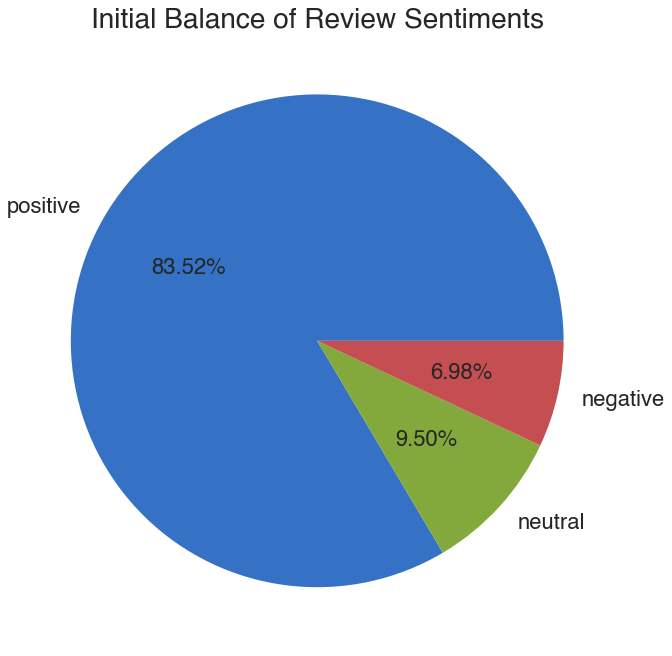

In [11]:
# Plot pie - Sentiments
fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(df['sentiment'], fig, ax)
ax.set_title('Initial Balance of Review Sentiments', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('imgs/pie_sentiments_initial')

Total Number of Ratings:  826927


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a50651b90>)

Text(0.5, 1, 'Counts of Hotel Ratings')

Text(0.5, 41.400000000000006, 'Hotel Rating')

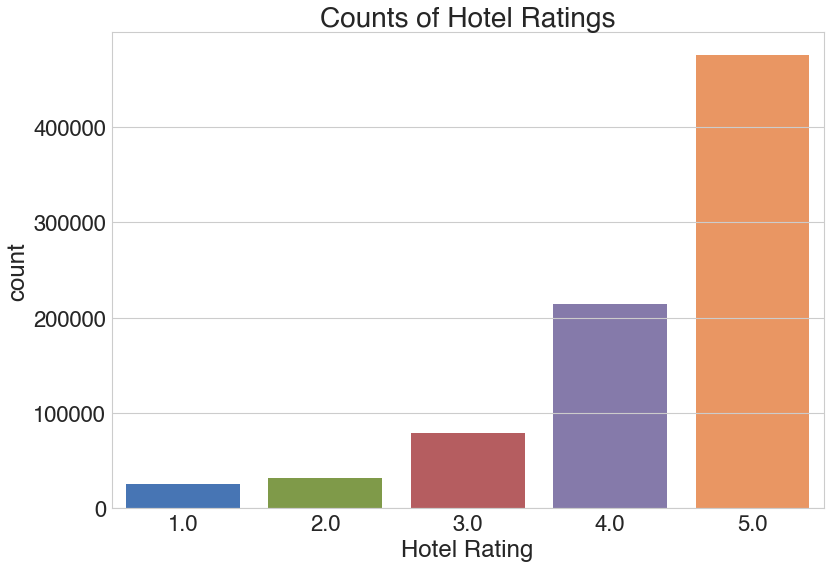

In [12]:
# Plot counts - Ratings
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
eda.plot_counts(df, 'rating', fig, ax)
ax.set_title('Counts of Hotel Ratings', size=BIGGEST_SIZE)
ax.set_xlabel('Hotel Rating')
fig.savefig('imgs/countplot_ratings_full')

# Train-Test-Val Split

In [13]:
target = 'sentiment'
features = ['review_body']
X_train, X_val, X_test, y_train, y_val, y_test, \
    indices_train, indices_val, indices_test = prep.train_test_val_split(df, target, features)

	Train: 529232, Val: 132309, Test: 165386


In [14]:
indices_train.shape, indices_val.shape, indices_test.shape

((529232,), (132309,), (165386,))

## Handling class imbalance by under-sampling train data

In [15]:
train_df_us = prep.undersample_train(df, target, indices_train, y_train)

	Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 441995
		Number neutral in train: 50299
		Number negative in train: 36938
	Final undersampled train size: 110814


Total Number of Ratings:  110814


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a50689790>)

Text(0.5, 1, 'Balance of Review Sentiments,\nAfter Under-Sampling Train')

Text(93.2, 0.5, '')

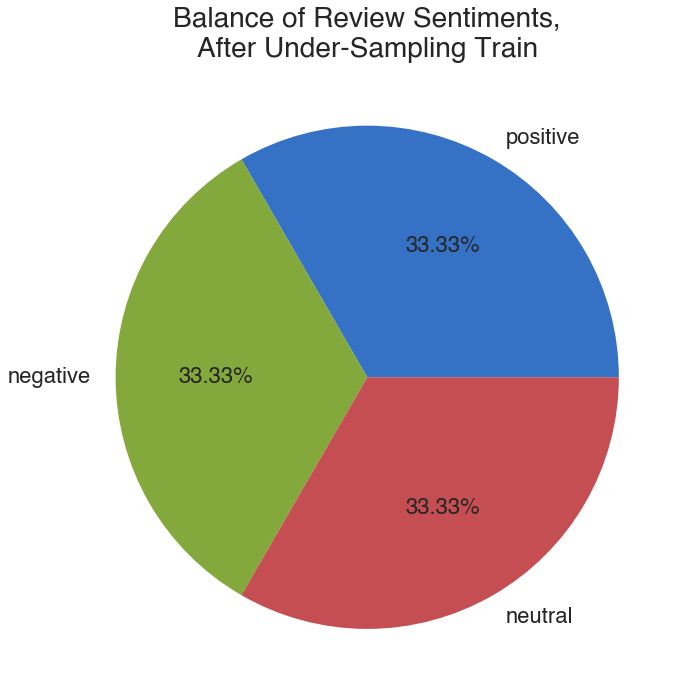

In [16]:
# Plot pie - Classes after undersampling
print('Total Number of Ratings: ', train_df_us.shape[0])

fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(train_df_us[target], fig, ax)
ax.set_title('Balance of Review Sentiments,\nAfter Under-Sampling Train', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('imgs/pie_sentiments_train_undersample')

# Modeling with TF-IDF

In [17]:
# ! python src/preprocess.py data

```
Processing files in data...
	Non-zip folders/files found in data: ['links_1']

Splitting data into train/val/test...
	Train: 213140, Val: 53285, Test: 66607
	Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 166155
		Number neutral in train: 26299
		Number negative in train: 20686
	Final undersampled train size: 62058
    
Getting bag of words for train data...

Starting modeling...

	Fitting LogisticRegression...
                Scores: {'fit_time': array([14.73221493, 14.67445898, 14.61940336, 14.66072369, 14.82588744]), 'score_time': array([1.42016864, 1.41654634, 1.41894245, 1.41845775, 1.41838765]), 'test_accuracy': array([0.75580084, 0.75733161, 0.7546729 , 0.75707034, 0.75183305]), 'train_accuracy': array([0.81660154, 0.81801152, 0.81873666, 0.81743106, 0.81745121])}
                Average train accuracy: 0.8176463969614115
                Average test accuracy: 0.7553417483627481
        
        
    Fitting MultinomialNB...
                Scores: {'fit_time': array([10.13023186, 10.1286757 , 10.13355589, 10.13215995, 10.13620377]), 'score_time': array([1.41610551, 1.41577578, 1.4157331 , 1.41798496, 1.41525722]), 'test_accuracy': array([0.7296165 , 0.7340477 , 0.72655495, 0.73168963, 0.72959471]), 'train_accuracy': array([0.7589131 , 0.75846997, 0.75959795, 0.75797128, 0.75811227])}
                Average train accuracy: 0.7586129151047422
                Average test accuracy: 0.7303006974596283


        Fitting RandomForestClassifier...
                Scores: {'fit_time': array([135.37750936, 135.43342757, 136.33951545, 135.32857227,
       135.47986341]), 'score_time': array([1.94026279, 1.93801475, 1.94030833, 1.94585085, 1.93872213]), 'test_accuracy': array([0.70488237, 0.70995811, 0.7087496 , 0.70904842, 0.69680122]), 'train_accuracy': array([1., 1., 1., 1., 1.])}
                Average train accuracy: 1.0
                Average test accuracy: 0.705887944725258


        Fitting GradientBoostingClassifier...
                Scores: {'fit_time': array([263.72342896, 266.55406952, 263.8704145 , 265.59878659,
       265.58436465]), 'score_time': array([1.4826808 , 1.48225331, 1.47889447, 1.48168659, 1.48074532]), 'test_accuracy': array([0.69416694, 0.69972607, 0.69344183, 0.69800983, 0.6876964 ]), 'train_accuracy': array([0.71729847, 0.71687548, 0.71788261, 0.71780772, 0.71849256])}
                Average train accuracy: 0.7176713680849213
                Average test accuracy: 0.6946082131200184


        Fitting XGBClassifier...
                Scores: {'fit_time': array([21.48981547, 21.50380468, 21.49269342, 21.56712437, 21.57016969]), 'score_time': array([1.61389542, 1.61442304, 1.61841702, 1.60971189, 1.61087203]), 'test_accuracy': array([0.72824686, 0.73324202, 0.73001934, 0.73249537, 0.72129562]), 'train_accuracy': array([0.85400637, 0.8536438 , 0.85275752, 0.85267992, 0.85541926])}
                Average train accuracy: 0.8537013733264303
                Average test accuracy: 0.7290598419431495
```

# LSTM

```
Train: 262240, Val: 65560, Test: 81950
Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 210407
		Number neutral in train: 29262
		Number negative in train: 22571
	Final undersampled train size: 67713
```

## Initial

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 250, 50)           9273100
_________________________________________________________________
lstm (LSTM)                  (None, 250, 50)           20200
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                2440
_________________________________________________________________
dropout (Dropout)            (None, 10)                0
_________________________________________________________________
dense (Dense)                (None, 8)                 88
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27
=================================================================
Total params: 9,295,855
Trainable params: 9,295,855
Non-trainable params: 0

Epoch 1/10
1059/1059 [==============================] - 362s 342ms/step - loss: 1.0864 - accuracy: 0.3643
Epoch 2/10
1059/1059 [==============================] - 373s 352ms/step - loss: 0.9109 - accuracy: 0.5358
Epoch 3/10
1059/1059 [==============================] - 381s 360ms/step - loss: 0.7072 - accuracy: 0.6770
Epoch 4/10
1059/1059 [==============================] - 381s 360ms/step - loss: 0.6283 - accuracy: 0.7241
Epoch 5/10
1059/1059 [==============================] - 373s 352ms/step - loss: 0.5818 - accuracy: 0.7497
Epoch 6/10
1059/1059 [==============================] - 376s 355ms/step - loss: 0.5502 - accuracy: 0.7666
Epoch 7/10
1059/1059 [==============================] - 386s 365ms/step - loss: 0.5234 - accuracy: 0.7808
Epoch 8/10
1059/1059 [==============================] - 384s 363ms/step - loss: 0.4974 - accuracy: 0.7972
Epoch 9/10
1059/1059 [==============================] - 378s 357ms/step - loss: 0.4776 - accuracy: 0.8064
Epoch 10/10
1059/1059 [==============================] - 386s 364ms/step - loss: 0.4598 - accuracy: 0.8167
2117/2117 [==============================] - 97s 46ms/step - loss: 0.3970 - accuracy: 0.8528

2117/2117 [==============================] - 99s 47ms/step - loss: 0.3970 - accuracy: 0.8528
Training Accuracy:  0.852760910987854
2049/2049 [==============================] - 117s 57ms/step - loss: 0.5592 - accuracy: 0.7957
Test Accuracy:  0.7957443594932556
```

## 2nd - max_length = 200

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, None, 64)          11869568
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048
_________________________________________________________________
dense (Dense)                (None, 64)                8256
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195
=================================================================

Total params: 11,944,067
Trainable params: 11,944,067
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
2117/2117 [==============================] - 928s 438ms/step - loss: 0.6532 - accuracy: 0.7020 - val_loss: 0.4346 - val_accuracy: 0.8075
Epoch 2/2
2117/2117 [==============================] - 939s 444ms/step - loss: 0.5507 - accuracy: 0.7600 - val_loss: 0.3763 - val_accuracy: 0.8435

Took 1871.23s to train
2117/2117 [==============================] - 109s 52ms/step - loss: 0.4894 - accuracy: 0.7941
Training Accuracy:  0.7940868139266968
2049/2049 [==============================] - 103s 50ms/step - loss: 0.3763 - accuracy: 0.8435
Test Accuracy:  0.8434563875198364

saved_models/lstm_tokens5000_2epochs_20200602-21:39:36.h5
```

**Added 2 more Epochs**
```
Will save model to: saved_models/lstm_tokens5000_2epochs_20200602-22:34:44.h5

Epoch 1/2
2117/2117 [==============================] - 942s 445ms/step - loss: 0.5055 - accuracy: 0.7823 - val_loss: 0.4022 - val_accuracy: 0.8396
Epoch 2/2
2117/2117 [==============================] - 934s 441ms/step - loss: 0.4651 - accuracy: 0.8040 - val_loss: 0.4806 - val_accuracy: 0.8138

Took 1880.52s to train
```

## 3rd - maxlen = 200, embedding_dim = 128

```
Will save model to: saved_models/lstm_tokens5000_2epochs_20200602-23:18:07.h5



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, None, 128)         23739136
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168
_________________________________________________________________
dense (Dense)                (None, 128)               32896
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387
=================================================================
Total params: 24,035,587
Trainable params: 24,035,587
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
2117/2117 [==============================] - 961s 454ms/step - loss: 0.6566 - accuracy: 0.7026 - val_loss: 0.5774 - val_accuracy: 0.7563
Epoch 2/2
2117/2117 [==============================] - 983s 464ms/step - loss: 0.5426 - accuracy: 0.7653 - val_loss: 0.4475 - val_accuracy: 0.8238

Took 1948.19s to train
2117/2117 [==============================] - 111s 52ms/step - loss: 0.5011 - accuracy: 0.7897
Training Accuracy:  0.7897301912307739
2049/2049 [==============================] - 106s 52ms/step - loss: 0.4475 - accuracy: 0.8238
Test Accuracy:  0.823825478553772
```

**Added 2 more Epochs**
```
Will save model to: saved_models/lstm_tokens5000_2epochs_20200602-23:58:30.h5

Epoch 1/2
2117/2117 [==============================] - 938s 443ms/step - loss: 0.4882 - accuracy: 0.7922 - val_loss: 0.4260 - val_accuracy: 0.8349
Epoch 2/2
2117/2117 [==============================] - 934s 441ms/step - loss: 0.4365 - accuracy: 0.8178 - val_loss: 0.5029 - val_accuracy: 0.7982

Took 1876.64s to train
2117/2117 [==============================] - 110s 52ms/step - loss: 0.3579 - accuracy: 0.8578
Training Accuracy:  0.8578264117240906
2049/2049 [==============================] - 106s 52ms/step - loss: 0.5029 - accuracy: 0.7982
Test Accuracy:  0.798245906829834
```

## 4th - maxlen = 400, embedding_dim = 100, num_words = 10000 (prev 5000), added dropout, batch_size=500

```
Will save model to: saved_models/lstm_tokens5000_4epochs_20200603-01:17:09.h5

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 400, 100)          18546200
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800
_________________________________________________________________
dense (Dense)                (None, 100)               20100
_________________________________________________________________
dropout (Dropout)            (None, 100)               0
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303
=================================================================
Total params: 18,727,403
Trainable params: 18,727,403
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
136/136 [==============================] - 462s 3s/step - loss: 0.8017 - accuracy: 0.6131 - val_loss: 0.4982 - val_accuracy: 0.7918
Epoch 2/4
136/136 [==============================] - 460s 3s/step - loss: 0.5711 - accuracy: 0.7511 - val_loss: 0.3904 - val_accuracy: 0.8361
Epoch 3/4
136/136 [==============================] - 462s 3s/step - loss: 0.5264 - accuracy: 0.7771 - val_loss: 0.4610 - val_accuracy: 0.8239
Epoch 4/4
136/136 [==============================] - 461s 3s/step - loss: 0.4864 - accuracy: 0.7947 - val_loss: 0.4550 - val_accuracy: 0.8014

Took 1858.39s to train
2117/2117 [==============================] - 184s 87ms/step - loss: 0.4243 - accuracy: 0.8273
Training Accuracy:  0.8273300528526306
2049/2049 [==============================] - 173s 85ms/step - loss: 0.4550 - accuracy: 0.8014
Test Accuracy:  0.801372766494751
```

## 4th - maxlen = 500, embedding_dim = 200, num_words = 10000 (prev 5000), added dropout, batch_size=1000

```
Will save model to: saved_models/lstm_tokens5000_5epochs_20200603-02:01:18.h5



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 500, 200)          37092400
_________________________________________________________________
bidirectional (Bidirectional (None, 400)               641600
_________________________________________________________________
dense (Dense)                (None, 200)               80200
_________________________________________________________________
dropout (Dropout)            (None, 200)               0
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603
=================================================================
Total params: 37,814,803
Trainable params: 37,814,803
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
68/68 [==============================] - 673s 10s/step - loss: 0.8739 - accuracy: 0.5732 - val_loss: 0.4085 - val_accuracy: 0.8338
Epoch 2/5
68/68 [==============================] - 675s 10s/step - loss: 0.5580 - accuracy: 0.7590 - val_loss: 0.4630 - val_accuracy: 0.7952
Epoch 3/5
68/68 [==============================] - 672s 10s/step - loss: 0.4998 - accuracy: 0.7890 - val_loss: 0.4149 - val_accuracy: 0.8224
Epoch 4/5
68/68 [==============================] - 674s 10s/step - loss: 0.4620 - accuracy: 0.8059 - val_loss: 0.4421 - val_accuracy: 0.8206
Epoch 5/5
68/68 [==============================] - 676s 10s/step - loss: 0.4371 - accuracy: 0.8197 - val_loss: 0.4888 - val_accuracy: 0.7863

Took 3411.24s to train
2117/2117 [==============================] - 356s 168ms/step - loss: 0.4065 - accuracy: 0.8345
Training Accuracy:  0.8344631195068359
2049/2049 [==============================] - 338s 165ms/step - loss: 0.4888 - accuracy: 0.7863
Test Accuracy:  0.7863331437110901
```

**Added 15 more epochs**

## 4th - maxlen = 500, embedding_dim = 64, lstm_cells = 100, num_words = 5000, added another dropout layer, batch_size=500

```
        Train: 262240, Val: 65560, Test: 81950
        Majority Class: positive, Middle Class: neutral, Minority Class: negative
                Number positive in train: 210407
                Number neutral in train: 29262
                Number negative in train: 22571
        Final undersampled train size: 67713

Will save model to: saved_models/lstm_tokens5000_10epochs_20200603-03:54:24.h5

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 500, 64)           11869568
_________________________________________________________________
dropout (Dropout)            (None, 500, 64)           0
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               132000
_________________________________________________________________
dense (Dense)                (None, 400)               80400
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1203
=================================================================
Total params: 12,083,171
Trainable params: 12,083,171
Non-trainable params: 0
__________________________________________________________
Epoch 1/10
136/136 [==============================] - 565s 4s/step - loss: 0.7649 - accuracy: 0.6313 - val_loss: 0.5214 - val_accuracy: 0.7995
Epoch 2/10
136/136 [==============================] - 569s 4s/step - loss: 0.5628 - accuracy: 0.7526 - val_loss: 0.4160 - val_accuracy: 0.8436
Epoch 3/10
136/136 [==============================] - 564s 4s/step - loss: 0.5211 - accuracy: 0.7749 - val_loss: 0.4198 - val_accuracy: 0.8173
Epoch 4/10
136/136 [==============================] - 569s 4s/step - loss: 0.5006 - accuracy: 0.7862 - val_loss: 0.3700 - val_accuracy: 0.8438
Epoch 5/10
136/136 [==============================] - 568s 4s/step - loss: 0.4915 - accuracy: 0.7914 - val_loss: 0.4074 - val_accuracy: 0.8350
Epoch 6/10
136/136 [==============================] - 564s 4s/step - loss: 0.4723 - accuracy: 0.7996 - val_loss: 0.3928 - val_accuracy: 0.8379
Epoch 7/10
136/136 [==============================] - 563s 4s/step - loss: 0.4586 - accuracy: 0.8072 - val_loss: 0.4425 - val_accuracy: 0.8199
Epoch 8/10
136/136 [==============================] - 565s 4s/step - loss: 0.4618 - accuracy: 0.8071 - val_loss: 0.4907 - val_accuracy: 0.8134
Epoch 9/10
136/136 [==============================] - 565s 4s/step - loss: 0.4475 - accuracy: 0.8130 - val_loss: 0.4125 - val_accuracy: 0.8351
Epoch 10/10
136/136 [==============================] - 566s 4s/step - loss: 0.4327 - accuracy: 0.8185 - val_loss: 0.4203 - val_accuracy: 0.8363

Took 5689.54s to train
2117/2117 [==============================] - 234s 110ms/step - loss: 0.3933 - accuracy: 0.8364
Training Accuracy:  0.8364420533180237
2049/2049 [==============================] - 216s 105ms/step - loss: 0.4203 - accuracy: 0.8363
Test Accuracy:  0.8363178968429565
```

## 5th - Same as above + 1 LSTM layer, more data!

```
       Train: 529232, Val: 132309, Test: 165386
        Majority Class: positive, Middle Class: neutral, Minority Class: negative
                Number positive in train: 441995
                Number neutral in train: 50299
                Number negative in train: 36938
        Final undersampled train size: 110814

Tokenizing X_train/val data...

Starting modeling...

Will save model to: saved_models/lstm_tokens5000_7epochs_20200603-17:10:40.h5



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
embedding (Embedding)        (None, 500, 64)           18985408
_________________________________________________________________
dropout (Dropout)            (None, 500, 64)           0
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 200)          132000
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240800
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0
_________________________________________________________________
dense (Dense)                (None, 400)               80400
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1203
=================================================================
Total params: 19,439,811
Trainable params: 19,439,811
Non-trainable params: 0
```

# Recommender System

## Check Data Sparsity

In [18]:
train_df_us.head()

,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder,city,user_name_clean,polarity,sentiment_int,sentiment
736565,393258447,https://www.tripadvisor.com/Hotel_Review-g1863...,The Montague on The Gardens,"July 16, 2016",The best thing about the Montague is the staff...,"Washington DC, District of Columbia","DCProfessionals</div><div class=""userLoc""><str...",18,2.0,The_Montague_on_The_Gardens-London_England__en...,links_5,London_England,DCProfessionals,0.0,0,negative
359321,595685681,https://www.tripadvisor.com/Hotel_Review-g1863...,DoubleTree by Hilton Hotel London - Victoria,"July 12, 2018",We booked our rooms months in advance. We chec...,Rincon,"skg94</div><div class=""userLoc""><strong>Rincon...",8,2.0,DoubleTree_by_Hilton_Hotel_London_Victoria-Lon...,links_6,London_England,skg94,0.0,0,negative
686667,608537475,https://www.tripadvisor.com/Hotel_Review-g1863...,Hilton London Tower Bridge,"August 20, 2018",Nice room and the view from our window was OK ...,"Nottingham, United Kingdom","ChickOnHerTravels</div><div class=""userLoc""><s...",84,2.0,Hilton_London_Tower_Bridge-London_England__en.csv,links_5,London_England,ChickOnHerTravels,0.0,0,negative
382005,212179218,https://www.tripadvisor.com/Hotel_Review-g1863...,Citadines Trafalgar Square London,"June 26, 2014",We searched long and hard for the perfect plac...,"St. Petersburg, Florida","Jeremy C</div><div class=""userLoc""><strong>St....",2,2.0,Citadines_Trafalgar_Square_London-London_Engla...,links_6,London_England,Jeremy C,0.0,0,negative
323515,728074750,https://www.tripadvisor.com/Hotel_Review-g6076...,The Empire Hotel,"November 21, 2019",The lobby is very nice and of course the locat...,n/a,pparisi2019,1,2.0,The_Empire_Hotel-New_York_City_New_York__en.csv,links_1,New_York_City_New_York,pparisi2019,0.0,0,negative


In [19]:
utility_matrix = train_df_us.pivot_table(values='rating',index='user_name_clean',columns='hotel_name')

In [20]:
utility_matrix

hotel_name,'Alohilani Resort Waikiki Beach,414 Hotel,6 Columbus - Central Park Hotel,A.Roma Lifestyle Hotel,ANA InterContinental Tokyo,APA Hotel & Resort Nishishinjuku Gochome-eki Tower,APA Hotel Shinjuku Gyoemmae,APA Hotel Shinjuku Kabukicho Tower,ARTOTEL Sanur,AYANA Resort and Spa Bali,...,White Sands Hotel,Wyndham Garden Chinatown,YOTEL New York,Yellow Square,Yes Hotel,citizenM Paris Gare de Lyon,dusitD2 Ao Nang Krabi,iQ Hotel Roma,ibis Styles Bangkok Khaosan Viengtai,nine hours Shinjuku-North
user_name_clean,,,,,,,,,,,,,,,,,,,,,
-Alex--Goat--001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-CU46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Ernie-1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-OuidaWarren-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Pikake-too,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
지훈 배,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
진구 윤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
초코 민,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Min number of ratings: 1


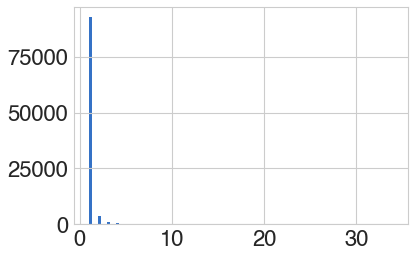

In [21]:
ratings = (utility_matrix > 0).sum(axis=1)
ratings.hist(bins=100)
print('Min number of ratings: {}'.format(ratings.min()))

In [22]:
num_reviews_by_user = train_df_us.groupby('user_name_clean').count()['rating']

In [32]:
num_reviews_by_user[num_reviews_by_user > 5][0:100]

user_name_clean
Adam B      6
Adam P      7
Alan C     11
Alan D      8
Alan S      8
           ..
Dave H      8
Dave M      9
Dave S      7
David A    10
David B    23
Name: rating, Length: 100, dtype: int64

In [24]:
num_reviews_by_user_loc = train_df_us.groupby('user_location').count()['rating']

In [25]:
num_reviews_by_user_loc

user_location
 Australia           1
 Israel              1
 Orlando Orlando     1
's-Gravendeel        1
, Massachusetts      1
                    ..
香港, 中國               1
香港特別行政區, 中國          1
서울                   1
서울, South Korea      1
서울, 대한민국             1
Name: rating, Length: 17460, dtype: int64

In [26]:
num_reviews_by_user_loc[num_reviews_by_user_loc > 5]

user_location
.                            27
Aalborg, Denmark              6
Aarhus, Denmark              12
Aberdeen                     14
Aberdeen, United Kingdom    103
                           ... 
uk                           46
usa                          12
vancouver                    12
wales                         9
yorkshire                     8
Name: rating, Length: 1852, dtype: int64

Min number of ratings: 1


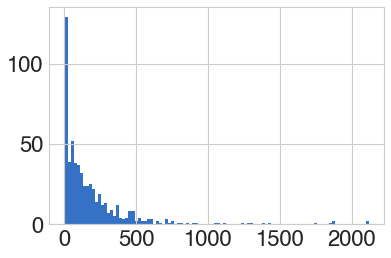

In [27]:
ratings = (utility_matrix > 0).sum(axis=0)
ratings.hist(bins=100)
print('Min number of ratings: {}'.format(ratings.min()))

In [28]:
number_ratings = (train_df_us['rating'] > 0).sum()
density = number_ratings / (utility_matrix.shape[0] * utility_matrix.shape[1])
print('The density is: {} '.format(density))

The density is: 0.001924539783964704 
